# Hypothyroidism Indicator Model

# 1.Defining the Question



## a) Specifying the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 

From the healthcare dataset provided, I'll be building models that determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

## b) Defining the metric of success

The models will be considered successful if they have an accuracy of 90% and above.

## c) Understanding the context

The data was gotten from Nairobi Hospital after a medical camp they conducted. 

## d) Recording the Experimental Design

For this project, I'll be doing the following:
1. Data cleaning
2. Exploratory Data Analysis with focus on univariate and bivariate analysis
3. Random Forest
4. Gradient Boosted Trees
5. SVM Linear kernel
6. SVM rbf kernel
7. SVM polynomial kernel

The different models built will allow me to assess their suitability and appropriateness in solving the given problem. 

## e) Data relevance

The data provided is of relevance to the question. It has a wide range of variables that wil be useful in determing the assessment question.

# 2.Reading the Data

In [0]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
# Load the Dataset

df = pd.read_csv('/content/hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# 3.Checking the Data

In [0]:
# Determine the no of records in the dataset
df.shape

(3163, 26)

In [0]:
# Check datatypes of the columns

df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
# At a first glance, there are ? in some columns.
# Check the counts of unique values in each column

df['status'].value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [0]:
df['age'].value_counts()

?     446
59     64
60     64
62     63
28     60
     ... 
8       1
93      1
7       1
97      1
4       1
Name: age, Length: 93, dtype: int64

In [0]:
df['sex'].value_counts()

F    2182
M     908
?      73
Name: sex, dtype: int64

In [0]:
df['on_thyroxine'].value_counts()

f    2702
t     461
Name: on_thyroxine, dtype: int64

In [0]:
df['query_on_thyroxine'].value_counts()

f    3108
t      55
Name: query_on_thyroxine, dtype: int64

In [0]:
df['on_antithyroid_medication'].value_counts()

f    3121
t      42
Name: on_antithyroid_medication, dtype: int64

In [0]:
df['thyroid_surgery'].value_counts()

f    3059
t     104
Name: thyroid_surgery, dtype: int64

In [0]:
df['query_hypothyroid'].value_counts()

f    2922
t     241
Name: query_hypothyroid, dtype: int64

In [0]:
df['query_hyperthyroid'].value_counts()

f    2920
t     243
Name: query_hyperthyroid, dtype: int64

In [0]:
df['pregnant'].value_counts()

f    3100
t      63
Name: pregnant, dtype: int64

In [0]:
df['sick'].value_counts()

f    3064
t      99
Name: sick, dtype: int64

In [0]:
df['tumor'].value_counts()

f    3123
t      40
Name: tumor, dtype: int64

In [0]:
df['lithium'].value_counts()

f    3161
t       2
Name: lithium, dtype: int64

In [0]:
df['goitre'].value_counts()

f    3064
t      99
Name: goitre, dtype: int64

In [0]:
df['TSH_measured'].value_counts()

y    2695
n     468
Name: TSH_measured, dtype: int64

In [0]:
df['TSH'].value_counts()

0       894
?       468
0.90     76
0.70     75
0.80     69
       ... 
0.92      1
200       1
9.40      1
90        1
37        1
Name: TSH, Length: 240, dtype: int64

In [0]:
df['T3_measured'].value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

In [0]:
df['T3'].value_counts()

?        695
1.60     141
1.80     141
2.10     139
1.70     138
        ... 
5.20       1
5.60       1
10.20      1
9.80       1
0          1
Name: T3, Length: 70, dtype: int64

In [0]:
df['TT4_measured'].value_counts()

y    2914
n     249
Name: TT4_measured, dtype: int64

In [0]:
df['TT4'].value_counts()

?       249
98       50
106      46
87       44
90       42
       ... 
287       1
267       1
29        1
204       1
8.60      1
Name: TT4, Length: 269, dtype: int64

In [0]:
df['T4U_measured'].value_counts()

y    2915
n     248
Name: T4U_measured, dtype: int64

In [0]:
df['T4U'].value_counts()

?       248
0.98     86
0.99     81
0.96     80
1.01     80
       ... 
0.30      1
0.27      1
1.61      1
2.03      1
1.94      1
Name: T4U, Length: 159, dtype: int64

In [0]:
df['FTI_measured'].value_counts()

y    2916
n     247
Name: FTI_measured, dtype: int64

In [0]:
df['FTI'].value_counts()

?      247
107     55
98      55
96      54
105     48
      ... 
257      1
247      1
650      1
345      1
264      1
Name: FTI, Length: 281, dtype: int64

In [0]:
df['TBG_measured'].value_counts()

n    2903
y     260
Name: TBG_measured, dtype: int64

In [0]:
df['TBG'].value_counts()

?       2903
28        14
23        13
25        13
21        13
20        12
31        12
30        12
19        10
33        10
27        10
29        10
36         9
26         9
32         9
16         8
17         8
38         7
18         7
34         6
110        5
39         5
35         5
40         4
37         4
22         4
108        4
14         3
24         3
43         3
13         2
65         2
15         2
41         2
53         2
52         1
11         1
3.10       1
12         1
48         1
0          1
50         1
80         1
69         1
8.40       1
8.50       1
122        1
86         1
7.30       1
63         1
47         1
45         1
9.30       1
Name: TBG, dtype: int64

In [0]:
# Check the descriptive statistics

df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# 4.External Data Source Validation

# 5.Tidying the Dataset

In [0]:
# Change the categorical values to numerical ones

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

df['status'] = en.fit_transform(df['status'])
df['sex'] = df['sex'].replace({'M':0, 'F':1})
df = df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0})

df.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,?
1,0,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,?
2,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,?
3,0,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,?
4,0,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,?


In [0]:
# Check the descriptive statistics

df.describe()

,status,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,0.780272,0.921277,0.921593,0.921910,0.082200
std,0.213248,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,0.414128,0.269348,0.268853,0.268356,0.274713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Change the ?'s to NaN values so they can be replaced with the appropriate values since I won't be deleting them

df.replace(to_replace='?', inplace=True, value=np.NaN)


In [0]:
# Check the datatypes in each column

df.dtypes

status                         int64
age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
TBG_measured                   int64
TBG                           object
dtype: object

In [0]:
# Change the datatype columns from object to int or float

# Columns with dtype as 'object'
cols = df.columns[df.dtypes.eq('object')]

# Convert to numeric values
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [0]:
# Replace the NaN values with the mean/median

df['age'].fillna(df['age'].mean(), inplace = True)
df['sex'].fillna(0, inplace = True)
df['TSH'].fillna(df['TSH'].mean(), inplace = True)
df['T3'].fillna(df['T3'].median(), inplace = True)
df['TT4'].fillna(df['TT4'].median(), inplace = True)
df['FTI'].fillna(df['FTI'].median(), inplace = True)
df['T4U'].fillna(df['T4U'].mean(), inplace = True)
df['TBG'].fillna(df['TBG'].mean(), inplace = True)

In [0]:
# Check for missing values

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
# Check for duplicated values

df.duplicated().any()

True

In [0]:
# Drop the duplicated columns

df.drop_duplicates(keep = False, inplace = True)

In [0]:
# Check whether changes have been made

df.duplicated().any()

False

In [0]:
# Check for outliers

# Find IQR Score first

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

status                        0.00000
age                          26.00000
sex                           1.00000
on_thyroxine                  0.00000
query_on_thyroxine            0.00000
on_antithyroid_medication     0.00000
thyroid_surgery               0.00000
query_hypothyroid             0.00000
query_hyperthyroid            0.00000
pregnant                      0.00000
sick                          0.00000
tumor                         0.00000
lithium                       0.00000
goitre                        0.00000
TSH_measured                  0.00000
TSH                           5.92318
T3_measured                   0.00000
T3                            0.70000
TT4_measured                  0.00000
TT4                          38.00000
T4U_measured                  0.00000
T4U                           0.19000
FTI_measured                  0.00000
FTI                          33.00000
TBG_measured                  0.00000
TBG                           0.00000
dtype: float

In [0]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


# True indicates the prescence of an outlier

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False
1,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3161,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [0]:
# Remove the outliers

df_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliers.shape

(1226, 26)

In [0]:
# Export the cleaned dataset

df_outliers.to_csv('df_clean.csv')

In [0]:
df_clean = pd.read_csv('df_clean.csv')
df_clean.head()

,Unnamed: 0,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,151,1,20.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.5,1,1.8,1,68.0,1,0.99,1,68.0,0,31.283077
1,153,1,29.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,2.5,1,83.0,1,0.93,1,89.0,0,31.283077
2,154,1,45.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1.9,1,1.0,1,82.0,1,0.73,1,112.0,0,31.283077
3,156,1,56.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.8,1,76.0,1,0.77,1,99.0,0,31.283077
4,158,1,62.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.4,1,2.2,1,103.0,1,0.99,1,104.0,0,31.283077


# 6.Exploratory Data Analysis

## a) Univariate Analysis

Create distplots for the columns that have continous values


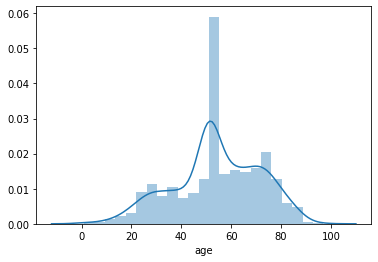

In [0]:
sns.distplot(df_clean["age"])

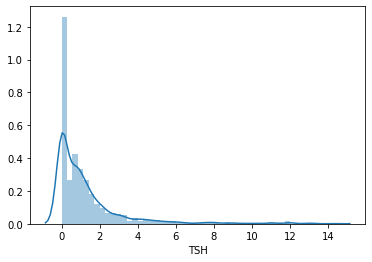

In [0]:
sns.distplot(df_clean["TSH"])

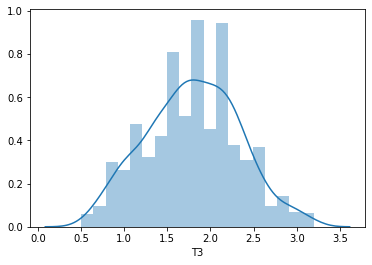

In [0]:
sns.distplot(df_clean["T3"])

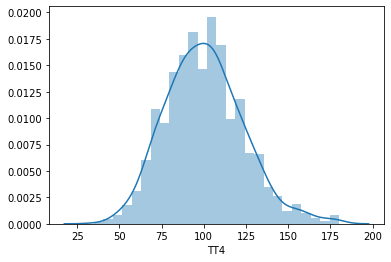

In [0]:
sns.distplot(df_clean["TT4"])

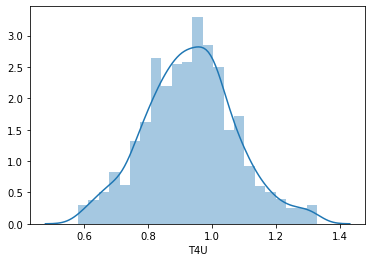

In [0]:
sns.distplot(df_clean["T4U"])

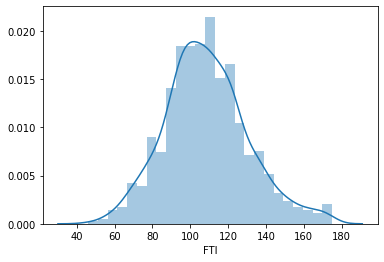

In [0]:
sns.distplot(df_clean["FTI"])

**Observation**

The distplots show how often each different value in a set of data occurs.

1. The average level of FTI in the patients who visited the clinical camp was 100
2. The average level of T4U in the patients who visited the clinical camp was 0.9
3. The average level of TT4 in the patients who visited the clinical camp was 100
4. The average level of T3 in the patients who visited the clinical camp was 1.75
5. The average level of TSH in the patients who visited the clinical camp was 0
6. The average age of the patients who visited the clinical camp was 50.


## b) Bivariate Analysis

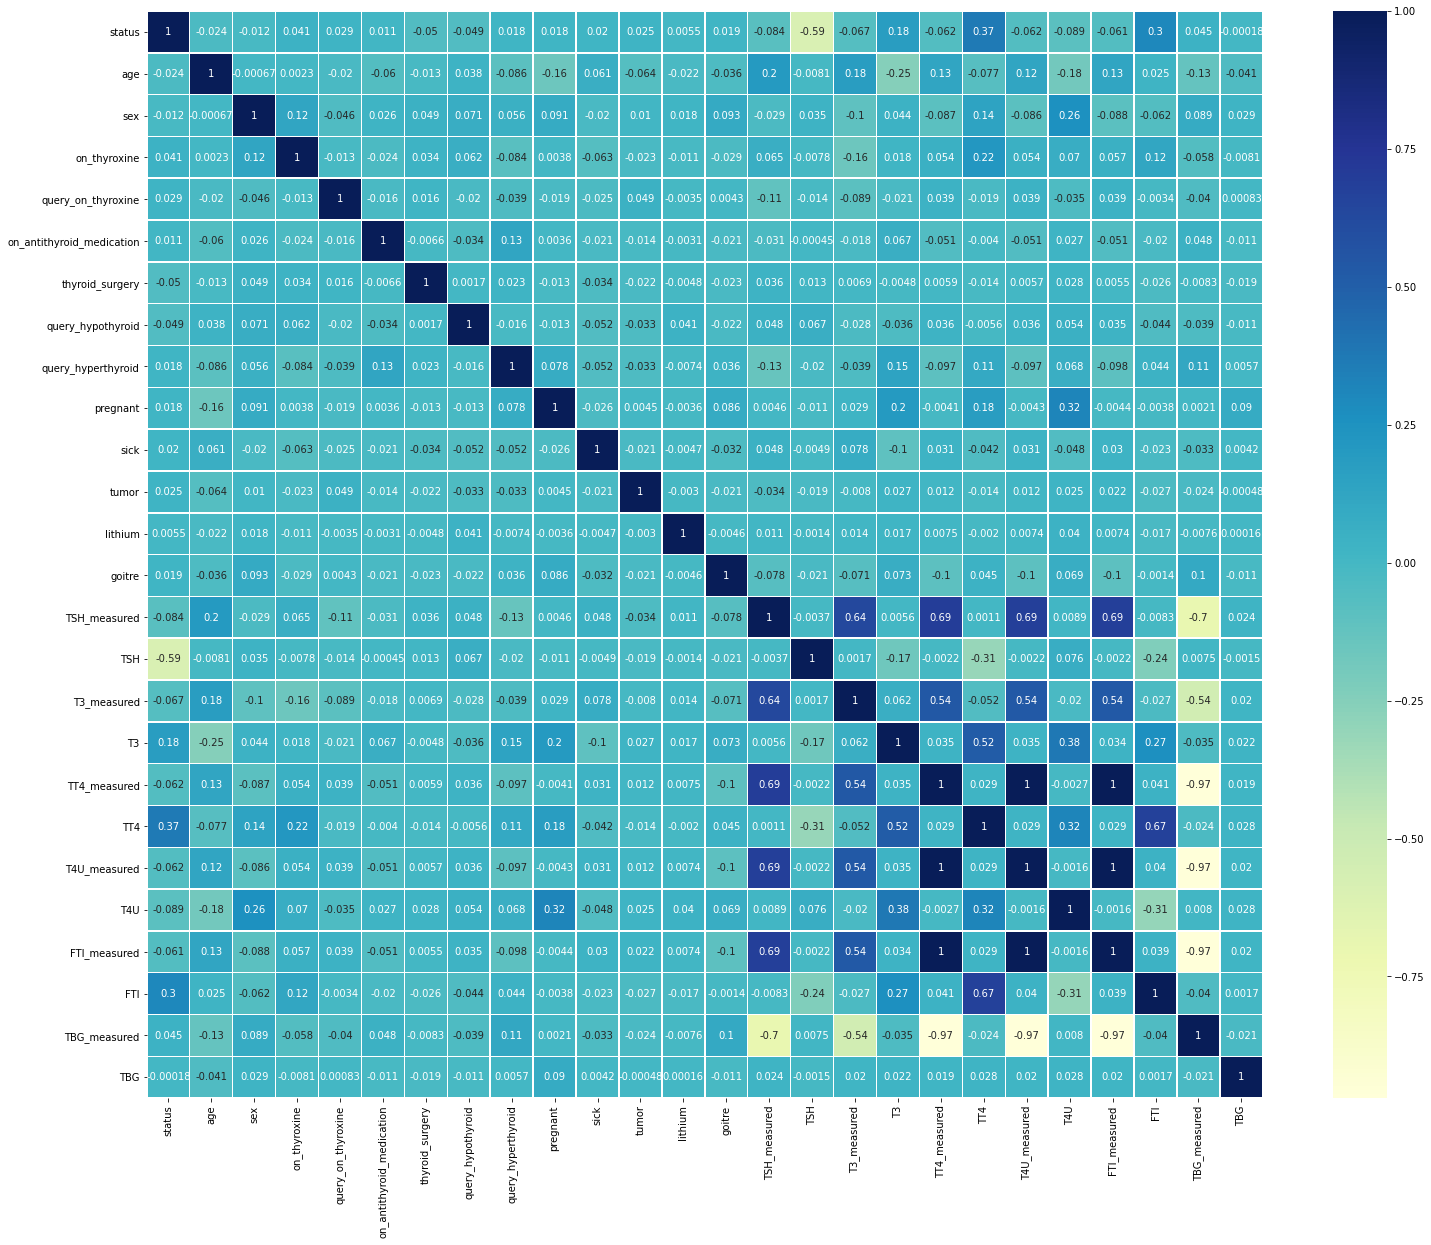

In [0]:
# Create a correlation matrix
correlation = df.corr()
correlation


fig, ax = plt.subplots(figsize=(25, 20)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax, cmap="YlGnBu")

In [0]:
# Get the correlation of the variables on the cleaned dataframe.
# I'll not be using the one that has the outliers removed. It has too many rows taken out and thus gives inaccurate figures

df.corr()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,1.000000,-0.023916,-0.012168,0.040714,0.029102,0.011493,-0.050044,-0.049340,0.017756,0.018415,0.019881,0.024755,0.005500,0.019268,-0.084018,-0.590975,-0.066630,0.179779,-0.061644,0.373421,-0.061500,-0.089390,-0.061356,0.303775,0.045282,-0.000175
age,-0.023916,1.000000,-0.000665,0.002333,-0.019775,-0.060157,-0.012580,0.037667,-0.086169,-0.156031,0.061427,-0.064438,-0.021823,-0.035603,0.204138,-0.008058,0.177168,-0.251175,0.127088,-0.077342,0.124673,-0.182978,0.125266,0.025310,-0.129587,-0.041205
sex,-0.012168,-0.000665,1.000000,0.123283,-0.045788,0.026169,0.048530,0.071400,0.056451,0.091091,-0.020107,0.010382,0.017551,0.092642,-0.028746,0.035297,-0.103002,0.043761,-0.086908,0.138204,-0.086230,0.257942,-0.088240,-0.062229,0.088974,0.029414
on_thyroxine,0.040714,0.002333,0.123283,1.000000,-0.013281,-0.024371,0.033522,0.061568,-0.084426,0.003776,-0.062949,-0.022593,-0.010541,-0.029143,0.065413,-0.007759,-0.161403,0.018074,0.054126,0.222203,0.053723,0.070331,0.056889,0.115342,-0.058476,-0.008085
query_on_thyroxine,0.029102,-0.019775,-0.045788,-0.013281,1.000000,-0.016229,0.015576,-0.020437,-0.038964,-0.019291,-0.024629,0.049153,-0.003518,0.004310,-0.111361,-0.013957,-0.088623,-0.020589,0.039426,-0.019350,0.039334,-0.034940,0.039241,-0.003397,-0.040430,0.000834
on_antithyroid_medication,0.011493,-0.060157,0.026169,-0.024371,-0.016229,1.000000,-0.006625,-0.034136,0.126917,0.003611,-0.021475,-0.013805,-0.003067,-0.021241,-0.030528,-0.000454,-0.018470,0.067147,-0.050578,-0.003958,-0.050827,0.027286,-0.051077,-0.020209,0.047922,-0.011132
thyroid_surgery,-0.050044,-0.012580,0.048530,0.033522,0.015576,-0.006625,1.000000,0.001661,0.022999,-0.013236,-0.033810,-0.021735,-0.004829,-0.022830,0.036341,0.013065,0.006939,-0.004774,0.005933,-0.014308,0.005711,0.028245,0.005488,-0.025652,-0.008321,-0.018677
query_hypothyroid,-0.049340,0.037667,0.071400,0.061568,-0.020437,-0.034136,0.001661,1.000000,-0.015518,-0.013457,-0.051804,-0.033302,0.041230,-0.022271,0.048468,0.067373,-0.028168,-0.036430,0.035944,-0.005587,0.035657,0.053989,0.035369,-0.044327,-0.039040,-0.010996
query_hyperthyroid,0.017756,-0.086169,0.056451,-0.084426,-0.038964,0.126917,0.022999,-0.015518,1.000000,0.077603,-0.051558,-0.033144,-0.007364,0.036255,-0.133495,-0.020323,-0.038716,0.145160,-0.096720,0.106736,-0.097269,0.068082,-0.097819,0.044156,0.109336,0.005688
pregnant,0.018415,-0.156031,0.091091,0.003776,-0.019291,0.003611,-0.013236,-0.013457,0.077603,1.000000,-0.025526,0.004520,-0.003646,0.085552,0.004623,-0.010862,0.029182,0.204136,-0.004066,0.177512,-0.004250,0.322336,-0.004436,-0.003769,0.002084,0.089970


**Observation**

1. TSH_measured and FTI_measured are moderately positively correlated.
2. TSH_measured and T3_measured are moderately positively correlated.
3. TT4_measured and T4U_measured are strongly positively correlated.
4. TT4_measured and FTI_measured are strongly positively correlated.
5. T4U_measured and FTI_measured are strongly positively correlated.
6. TT4 and FTI are moderately positively correlated.
7. TSH_measured and T4U_measured are moderately positively correlated.
8. TSH_measured and TT4_measured are moderately positively correlated.
9. TBH_measured and TBG_measured are moderately negatively correlated.
10. TBG_measured and TT4_measured are strongly negatively correlated.
11. TSH_measured and TBG_measured are moderately negatively correlated.
12. TBG_measured and T4U_measured are strongly negatively correlated.
13. TBG_measured and FTI_measured are strongly negatively correlated.

# 7.Decision Trees

## Model 1: Random Forests

In [0]:
# Define our X and y variables

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

X = df[test_features].values
y = df['status'].values

In [0]:
# Divide the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
# Create a random forest. 
forest = RandomForestClassifier(random_state=42)

# Check for available hyperparameters and look at the default values used by the current forest

forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [0]:
# I'll be using RandomizedSearchCV to try and adjust the hyperparameters

# Create a parameter grid to sample from during fitting

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [0]:
# Instantiate random search and fit it on to the train set

# Use the random grid to search for best hyperparameters
# First create the base model to tune
forest = RandomForestClassifier()

# Do a random search of parameters using 3 fold cross validation, search across 100 different combinations, and use 1 core

forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

# Fit the random search model on to the train set

forest_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
# View the best parameters from fitting the random search

forest_random.best_params_


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 800}

In [0]:
# Get the accuracy of the model built from fitting the random search

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9883720930232558


In [0]:
# Check the RMSE values

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.011627906976744186
Mean Squared Error: 0.011627906976744186
Root Mean Squared Error: 0.10783277320343841


The accuracy of the model is at 98 % which is very high and indicates that the model is not overfit.

The RMSE value is also very low which shows that the model was a good fit.

In [0]:
# Do predictions based on the trained model 

y_pred = forest_random.predict(X_test)

# Make a comparison data frame

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

# Their means are very close to each other. There is only a difference of 0.022
# showing that the model is making accurate predictions

,Actual,Predicted
count,602.000000,602.000000
mean,0.961794,0.968439
std,0.191853,0.174975
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# The results from the confusion matrix tells us that 19 and 579 are the number of correct predictions.
# 4 and 0 are the number of incorrect predictions

[[ 19   4]
 [  0 579]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.99      1.00      1.00       579

    accuracy                           0.99       602
   macro avg       1.00      0.91      0.95       602
weighted avg       0.99      0.99      0.99       602



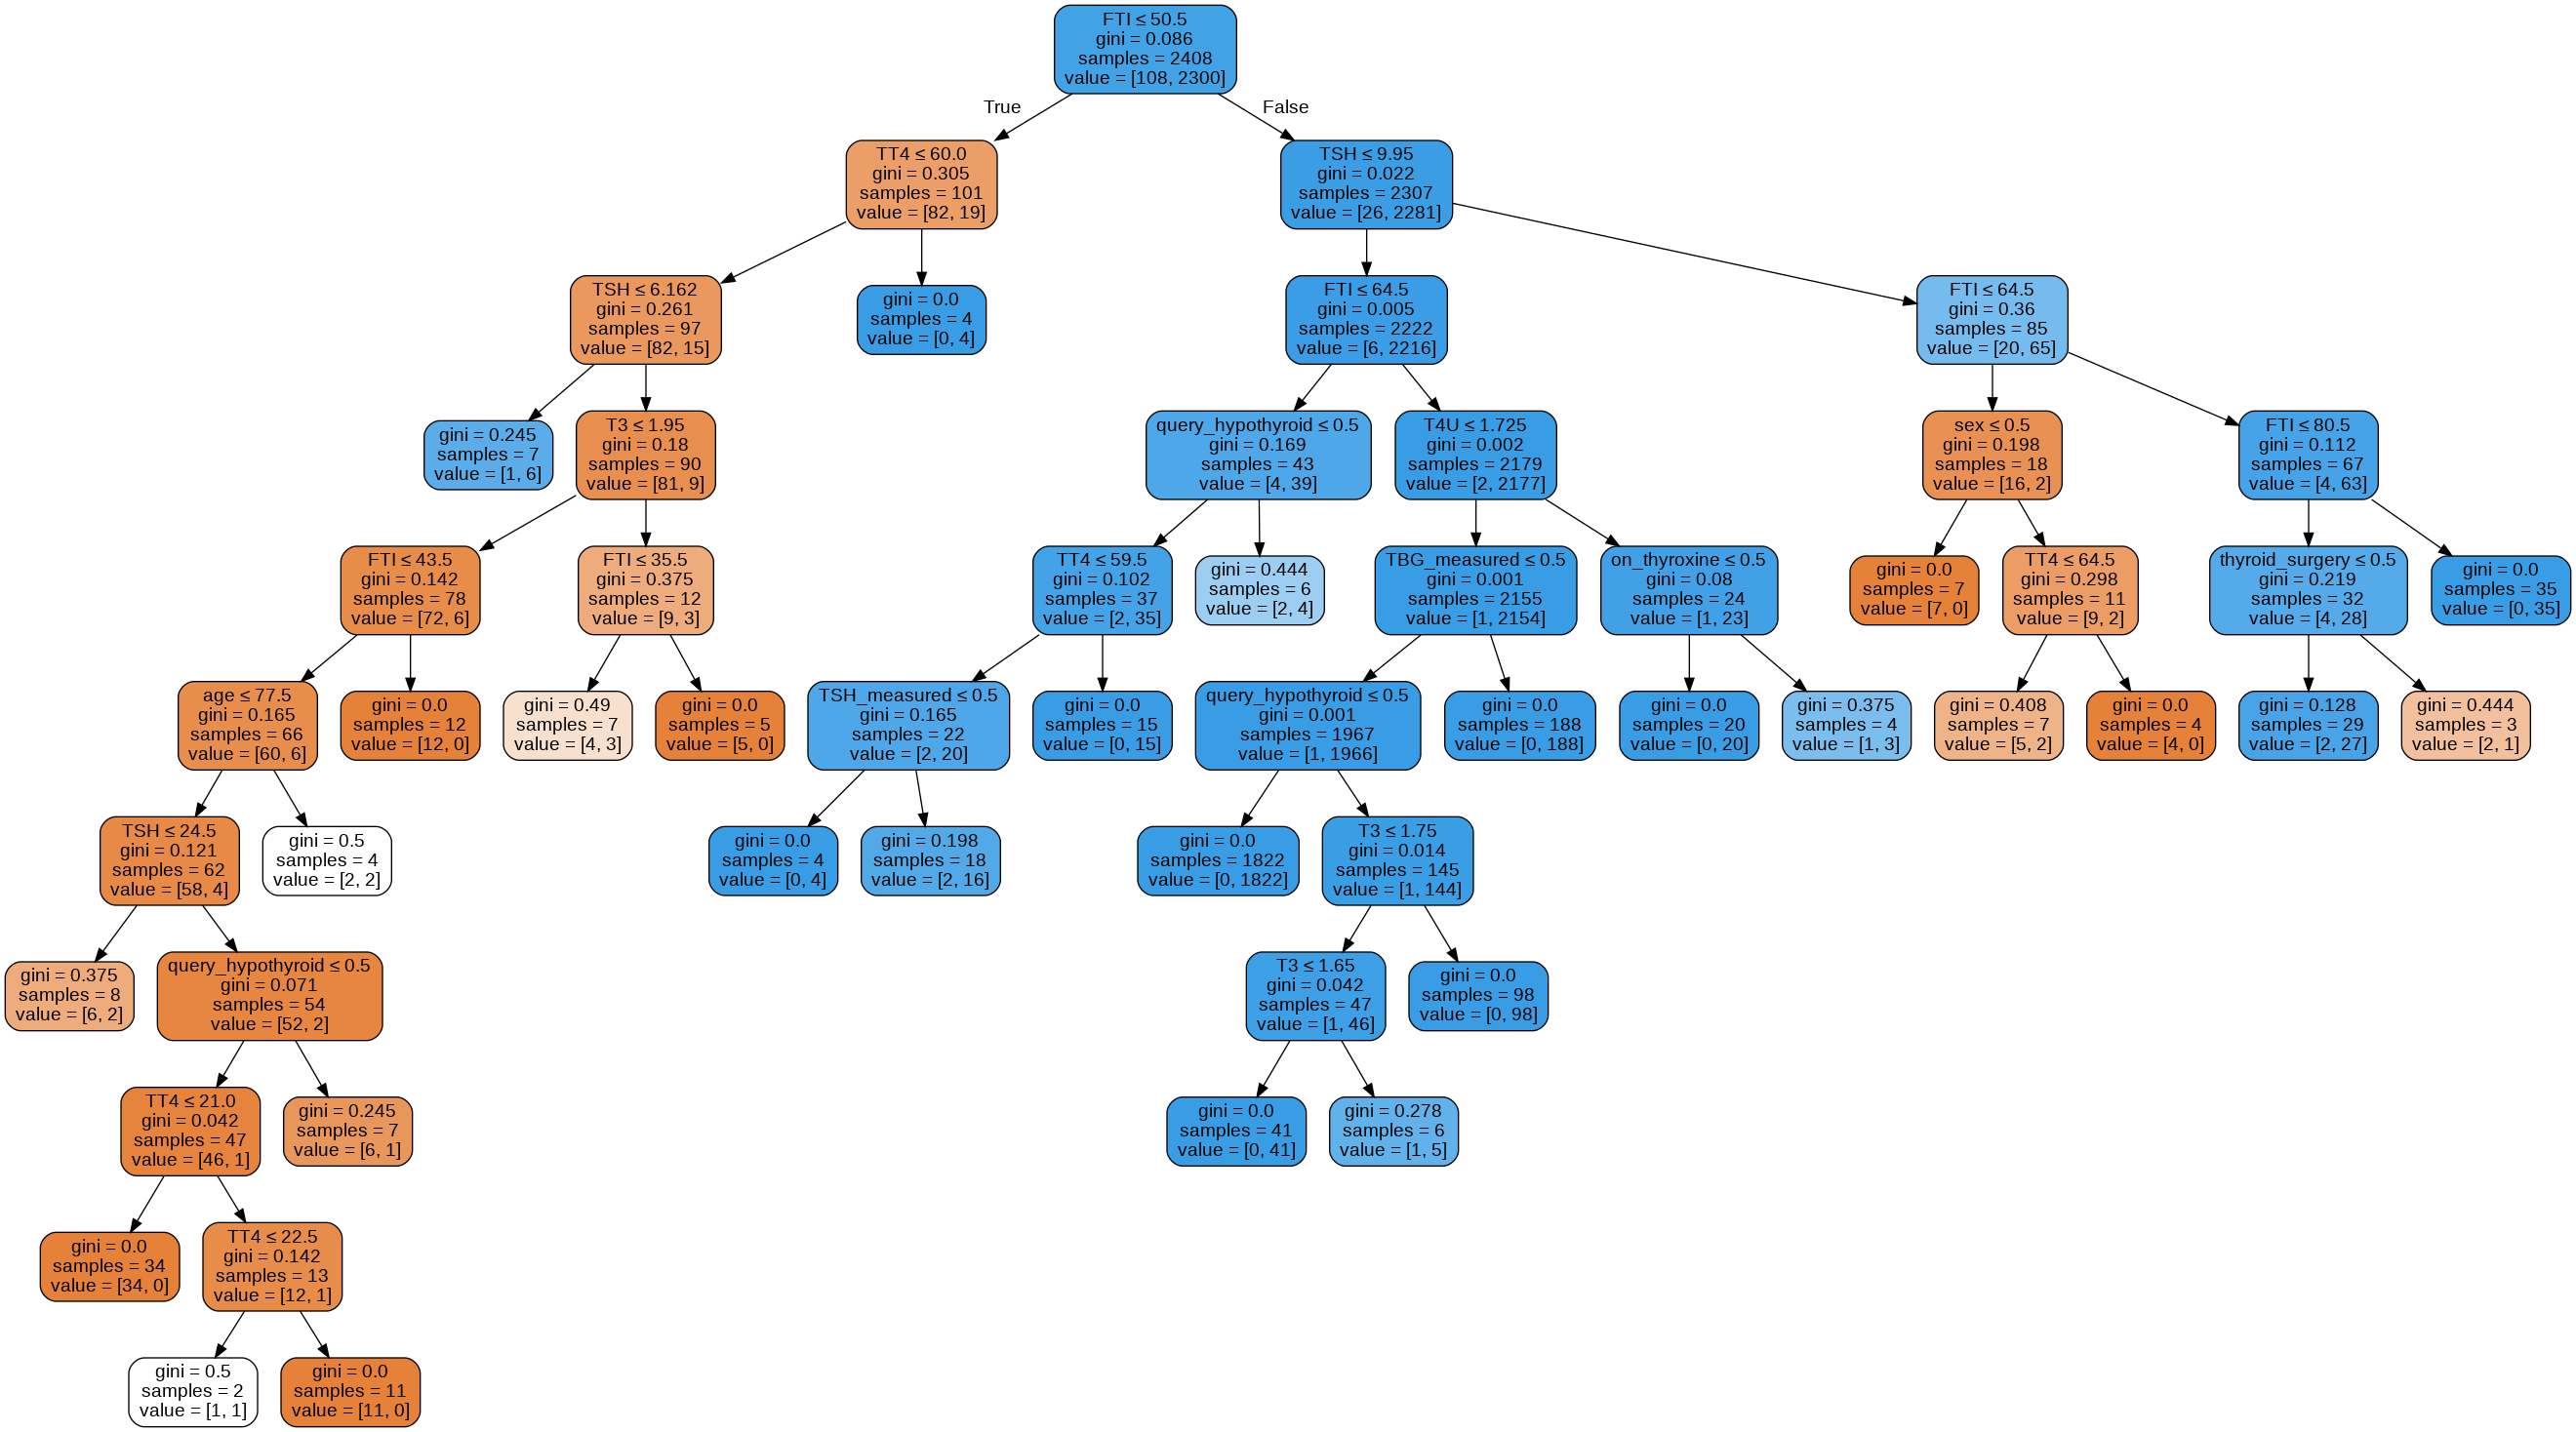

In [0]:
# Check what one of the trees looks like

dot_data = StringIO()

# Pick a specific tree from the forest
tree = forest_random.best_estimator_[90]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [0]:
# Get numerical feature importances

importances = list(tree.feature_importances_)

# Connect each feature with its importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sort the values in descending order

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:26} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.1), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.04), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.83), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: FTI                        Importance: 0.83
Variable: TSH                        Importance: 0.1
Variable: TT4                        Importance: 0.04
Variable: age                        Importance: 0.01
Variable: thyroid_surgery            Importance: 0.01
Variable: query_hypothyroid          Importance: 0.01
Variable: T3                         Importance: 0.01
Variable: sex                        Importance: 0.0
Variable: on_thyroxine               Importance: 0.0
Varia

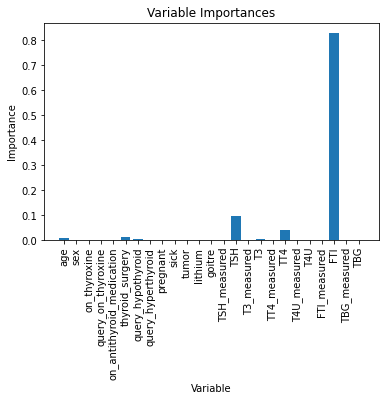

In [0]:
# Plot the features by order of importance

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

From the list, the most important variables in predicting whether a patient has hypothyroidism or not are levels of FTI, TSH and TT4.

## Model 2: Gradient Boosted Trees

In [0]:
# Define our X and y variables
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

X = df[test_features].values
y = df['status'].values

In [0]:
# Divide the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Do hyperparameter tuning manually repeatedly till I get the best results

learningrate_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learningrate_list:
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=2, min_samples_split = 2, random_state=42)
    gbc.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gbc.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.995
Accuracy score (test): 0.992
Learning rate:  0.075
Accuracy score (training): 0.997
Accuracy score (test): 0.992
Learning rate:  0.1
Accuracy score (training): 0.998
Accuracy score (test): 0.992
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (test): 0.988
Learning rate:  0.5
Accuracy score (training): 0.998
Accuracy score (test): 0.988
Learning rate:  0.75
Accuracy score (training): 0.992
Accuracy score (test): 0.987
Learning rate:  1
Accuracy score (training): 0.973
Accuracy score (test): 0.978


From the above list, the learning rate of 0.1 gives the best accuracy score for the training and test set.

As the learning rate increases, the accuracy becomes lower, though by a small margin.

I'll use the learning rate of 0.1 to fit the GradientBoostingClassifier on the training data

In [0]:
# Fit the GradientBoostingClassifier on the training data

gbc = gbc.fit(X_train, y_train)

In [0]:
# Do predictions based on the trained model

y_pred_gbc = gbc.predict(X_test)

In [0]:
# Do a comparison data frame of the actual y values and the predicted values

new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gbc})
new.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.955150,0.943522
std,0.207148,0.231035
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Their means are very close to each other. There is only a difference of 0.011
showing that the model is making accurate predictions

In [0]:
# Get the accuracy score of the model built after tuning the hyperparameters

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbc))

Accuracy: 0.978405315614618


The score of 0.97 is good. It shows that the model was not overfit and is thus likely to perform well on data that is not from this dataset.

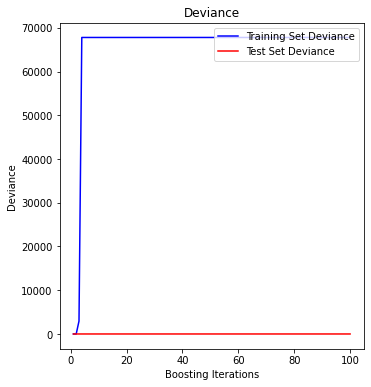

In [0]:
# Plot the error progression graph

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')

# the train_score_ variable records the deviance of the model for any given number of trees
# gbc.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbc.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(100) + 1, gbc.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of 
# the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((100,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbc.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbc.loss_(y_test, y_pred)
    
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()


In [0]:
# Get the features importances

importances = list(gbc.feature_importances_)

# Connect each feature with its importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sort the values in descending order

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:26} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.67), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.33), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                        Importance: 0.67
Variable: FTI                        Importance: 0.33
Variable: age                        Importance: 0.0
Variable: sex                        Importance: 0.0
Variable: on_thyroxine               Importance: 0.0
Variable: query_on_thyroxine         Importance: 0.0
Variable: on_antithyroid_medication  Importance: 0.0
Variable: thyroid_surgery            Importance: 0.0
Variable: query_hypothyroid          Importance: 0.0
Variable: que

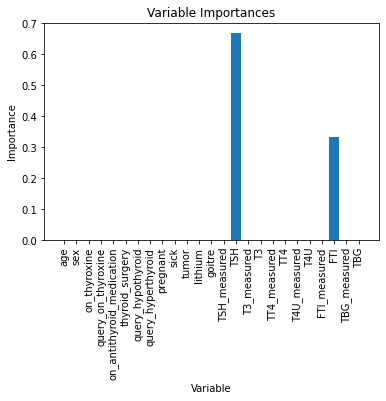

In [0]:
# Plot the features by order of importance

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

From the list, the most important variables in predicting whether a patient has hypothyroidism or not are levels of TSH and FTI.

**Conclusion**

Of the 2 models, I trust the random forest more as it has a higher accuracy score of 0.98.

The most important features in predicting whether an individual has hypothyroidism or not are levels of FTI, TSH and TT4.